In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [2]:
matplotlib.rcParams['figure.figsize'] = [14.0, 6.0]
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['lines.linewidth'] = 2.0

# Read S&P500 index data

In [3]:
data = pd.read_csv('S&P-20y.csv',  parse_dates=['Date'], index_col=['Date'])

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-10-25,1398.130005,1398.130005,1362.209961,1364.900024,1364.900024,1315600000
2000-10-26,1364.900024,1372.719971,1337.810059,1364.439941,1364.439941,1303800000
2000-10-27,1364.439941,1384.569946,1364.130005,1379.579956,1379.579956,1086300000
2000-10-30,1379.579956,1406.359985,1376.859985,1398.660034,1398.660034,1186500000
2000-10-31,1398.660034,1432.219971,1398.660034,1429.400024,1429.400024,1366400000
...,...,...,...,...,...,...
2020-10-19,3493.659912,3502.419922,3419.929932,3426.919922,3426.919922,4086200000
2020-10-20,3439.379883,3476.929932,3435.649902,3443.120117,3443.120117,3901260000
2020-10-21,3439.909912,3464.860107,3433.060059,3435.560059,3435.560059,4097750000


# Add return column

In [5]:
data['Ret'] = data['Close'].pct_change()

data

,Open,High,Low,Close,Adj Close,Volume,Ret
Date,,,,,,,
2000-10-25,1398.130005,1398.130005,1362.209961,1364.900024,1364.900024,1315600000,NaN
2000-10-26,1364.900024,1372.719971,1337.810059,1364.439941,1364.439941,1303800000,-0.000337
2000-10-27,1364.439941,1384.569946,1364.130005,1379.579956,1379.579956,1086300000,0.011096
2000-10-30,1379.579956,1406.359985,1376.859985,1398.660034,1398.660034,1186500000,0.013830
2000-10-31,1398.660034,1432.219971,1398.660034,1429.400024,1429.400024,1366400000,0.021978
...,...,...,...,...,...,...,...
2020-10-19,3493.659912,3502.419922,3419.929932,3426.919922,3426.919922,4086200000,-0.016330
2020-10-20,3439.379883,3476.929932,3435.649902,3443.120117,3443.120117,3901260000,0.004727
2020-10-21,3439.909912,3464.860107,3433.060059,3435.560059,3435.560059,4097750000,-0.002196


# Drop rows with NANs

In [6]:
data.dropna(inplace=True)

data

,Open,High,Low,Close,Adj Close,Volume,Ret
Date,,,,,,,
2000-10-26,1364.900024,1372.719971,1337.810059,1364.439941,1364.439941,1303800000,-0.000337
2000-10-27,1364.439941,1384.569946,1364.130005,1379.579956,1379.579956,1086300000,0.011096
2000-10-30,1379.579956,1406.359985,1376.859985,1398.660034,1398.660034,1186500000,0.013830
2000-10-31,1398.660034,1432.219971,1398.660034,1429.400024,1429.400024,1366400000,0.021978
2000-11-01,1429.400024,1429.599976,1410.449951,1421.219971,1421.219971,1206800000,-0.005723
...,...,...,...,...,...,...,...
2020-10-19,3493.659912,3502.419922,3419.929932,3426.919922,3426.919922,4086200000,-0.016330
2020-10-20,3439.379883,3476.929932,3435.649902,3443.120117,3443.120117,3901260000,0.004727
2020-10-21,3439.909912,3464.860107,3433.060059,3435.560059,3435.560059,4097750000,-0.002196


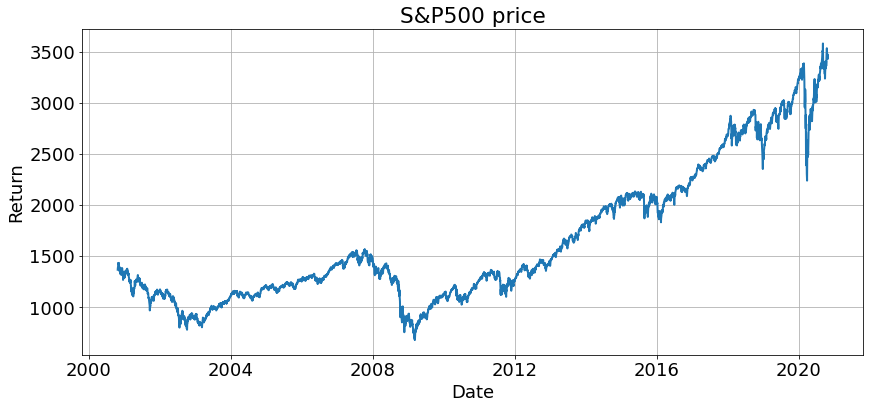

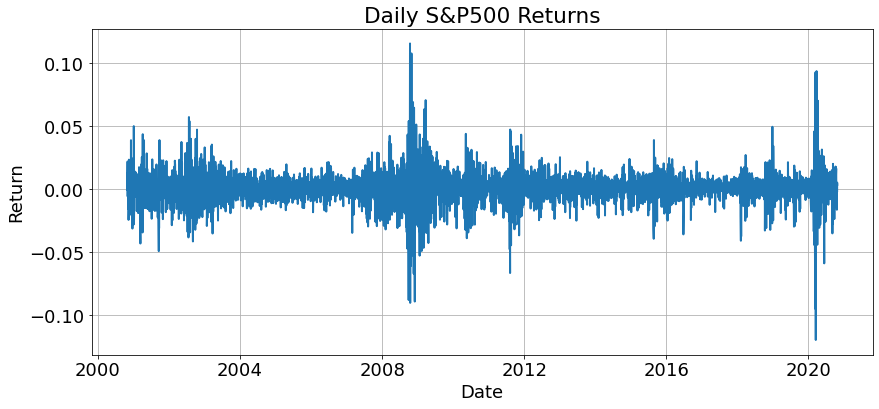

In [7]:
plt.plot(data.index, data['Close'])
plt.grid(True)
plt.title('S&P500 price')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

plt.plot(data.index, data['Ret'])
plt.grid(True)
plt.title('Daily S&P500 Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

# Plot return historgram

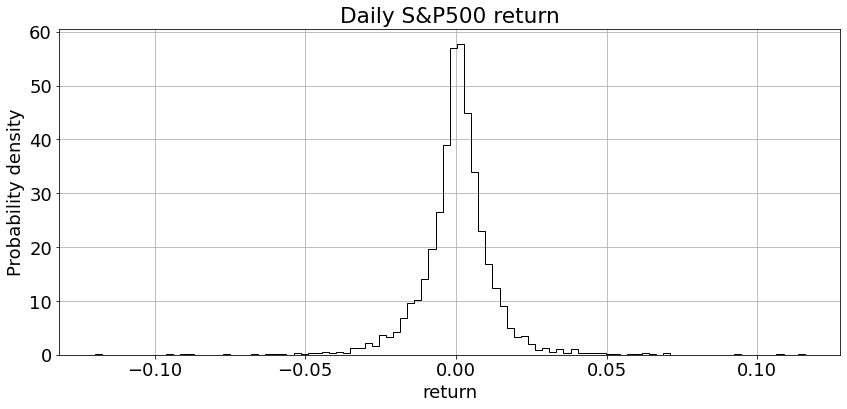

In [8]:
n, bins, patches = plt.hist(data['Ret'], 100, density=True, color='k', histtype='step')

plt.xlabel('return')
plt.ylabel('Probability density')
plt.title('Daily S&P500 return')
plt.grid(True)
plt.show()

# Fit a Gaussian Mixture Model

In [9]:
r = data['Ret'].values.reshape([-1,1])

r

array([[-0.00033708],
       [ 0.01109614],
       [ 0.01383035],
       ...,
       [-0.0021957 ],
       [ 0.00521893],
       [ 0.00344576]])

In [10]:
n_components = 5

clf = GaussianMixture(n_components)

clf.fit(r)

GaussianMixture(n_components=5)

# Evaluate the fitted GMM density on the range -0.1 ... +0.1

In [11]:
x = np.linspace(-0.1, 0.1, 500).reshape(-1,1)

log_p = clf.score_samples(x)
p = np.exp(log_p)

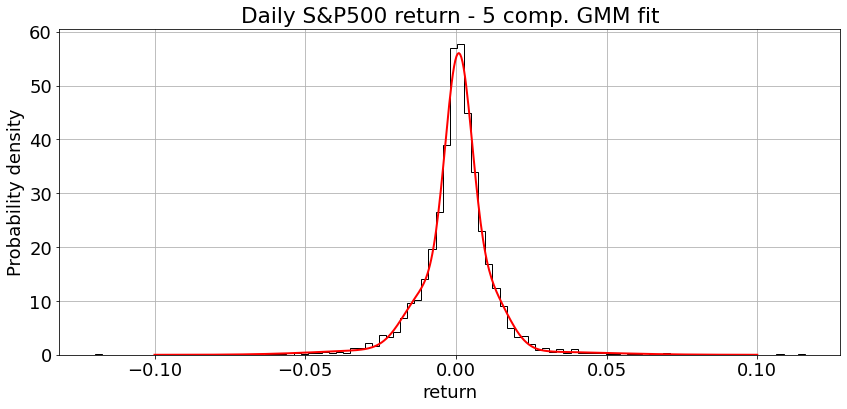

In [12]:
n, bins, patches = plt.hist(data['Ret'], 100, density=True, color='k', histtype='step')

plt.xlabel('return')
plt.ylabel('Probability density')
plt.title('Daily S&P500 return - 5 comp. GMM fit')
plt.plot(x, p, color='r')
plt.grid(True)
plt.show()

In [13]:
w = clf.weights_
mu = clf.means_
sigma = clf.covariances_

print('w:', w)
print('mu:', mu[:,0])
print('sigma:', sigma[:,0,0]**0.5)

w: [0.18603282 0.5602546  0.17617229 0.04831352 0.02922677]
mu: [-0.01025896  0.0008953   0.01085884 -0.02272176  0.02925637]
sigma: [0.00715835 0.00457116 0.00652203 0.02173148 0.02247125]


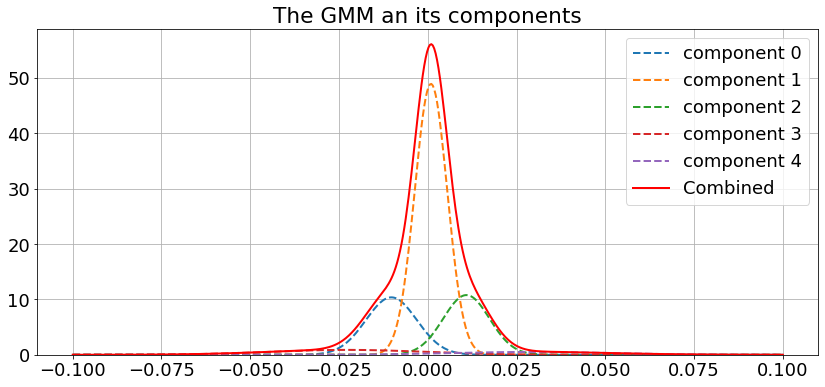

In [14]:
p = 0*x
for i in range(len(w)):
    pi = w[i] * norm(mu[i,0], sigma[i,0]**.5).pdf(x)
    plt.plot(x, pi, lw=2, ls='--', label=f'component {i}' )
    p += pi
plt.plot(x,p,lw=2,c='r',label='Combined')
plt.legend()
plt.grid()
plt.title('The GMM an its components')
plt.gca().set_ylim(bottom=0)
plt.show()

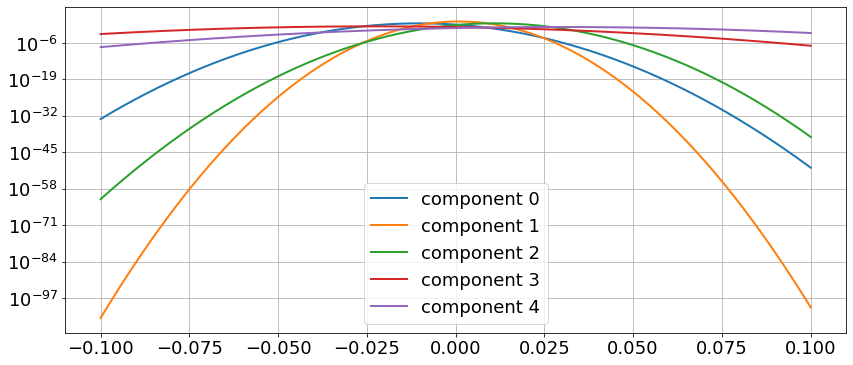

In [15]:
for i in range(len(w)):
    pi = w[i] * norm(mu[i,0], sigma[i,0]**.5).pdf(x)
    plt.semilogy(x, pi, lw=2, label=f'component {i}' )
plt.legend()
plt.grid()
plt.show()

In [16]:
def gmm_sample(w, mu, sigma):
    
    # First pick one of the components, use the weight as selection probability
    i = np.random.choice(len(w), p=w)
    
    # Get the distribution parameters of the selected density
    mu_i = mu[i,0]
    sigma_i = sigma[i,0,0]**.5
    
    # Draw a random sample
    sample = np.random.normal(loc=mu_i, scale=sigma_i, size=1) 
    
    return sample

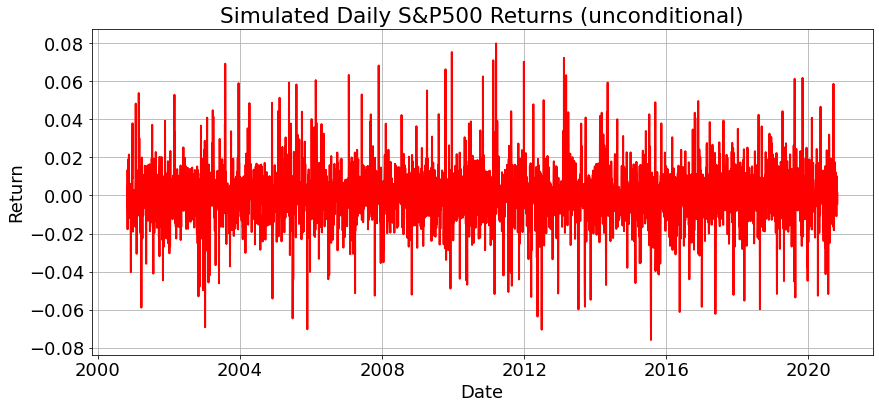

In [17]:
sim = []

for i in range(len(data.index)):
    sim.append(gmm_sample(w, mu, sigma))
    
sim = np.array(sim)

plt.plot(data.index, sim, c='r')
plt.grid(True)
plt.title('Simulated Daily S&P500 Returns (unconditional)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()